In [1]:
## Importing required libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [2]:
## Reading the train data
train_data = pd.read_csv('/kaggle/input/customer-life-time-prediction/train_BRCpofr.csv')
train = train_data.copy()
train.head()

,id,gender,area,qualification,income,marital_status,vintage,claim_amount,num_policies,policy,type_of_policy,cltv
0,1,Male,Urban,Bachelor,5L-10L,1,5,5790,More than 1,A,Platinum,64308
1,2,Male,Rural,High School,5L-10L,0,8,5080,More than 1,A,Platinum,515400
2,3,Male,Urban,Bachelor,5L-10L,1,8,2599,More than 1,A,Platinum,64212
3,4,Female,Rural,High School,5L-10L,0,7,0,More than 1,A,Platinum,97920
4,5,Male,Urban,High School,More than 10L,1,6,3508,More than 1,A,Gold,59736


In [3]:
## Splitting the data into X and y
X = train.drop('cltv',axis=1)
y = train['cltv']

### Exploratory Data Analysis

In [4]:
## checking the basic info about the features
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 89392 entries, 0 to 89391
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   id              89392 non-null  int64 
 1   gender          89392 non-null  object
 2   area            89392 non-null  object
 3   qualification   89392 non-null  object
 4   income          89392 non-null  object
 5   marital_status  89392 non-null  int64 
 6   vintage         89392 non-null  int64 
 7   claim_amount    89392 non-null  int64 
 8   num_policies    89392 non-null  object
 9   policy          89392 non-null  object
 10  type_of_policy  89392 non-null  object
dtypes: int64(4), object(7)
memory usage: 7.5+ MB


In [5]:
## finding the number of rows and columns in the data
print(f"The number of rows in the data are {train.shape[0]}.\n")
print(f"The number of independent features in the data are {train.shape[1]}.")

The number of rows in the data are 89392.

The number of independent features in the data are 12.


In [6]:
column_names = list(X.columns)
column_names.remove('id') # removing id column since it is not useful for model training
print("The data features are: \n")
column_names

The data features are: 



['gender',
 'area',
 'qualification',
 'income',
 'marital_status',
 'vintage',
 'claim_amount',
 'num_policies',
 'policy',
 'type_of_policy']

In [7]:
## removing id column since it won't be of any use in training machine learning model
X.drop('id',axis=1,inplace=True)

In [8]:
X.head()

,gender,area,qualification,income,marital_status,vintage,claim_amount,num_policies,policy,type_of_policy
0,Male,Urban,Bachelor,5L-10L,1,5,5790,More than 1,A,Platinum
1,Male,Rural,High School,5L-10L,0,8,5080,More than 1,A,Platinum
2,Male,Urban,Bachelor,5L-10L,1,8,2599,More than 1,A,Platinum
3,Female,Rural,High School,5L-10L,0,7,0,More than 1,A,Platinum
4,Male,Urban,High School,More than 10L,1,6,3508,More than 1,A,Gold


In [9]:
## finding out the names of categorical and numerical features in the data
cat_feat = [feature for feature in X.columns if X[feature].dtypes == 'O']
num_feat = [feature for feature in X.columns if feature not in cat_feat]

In [10]:
print(f"The categorical features are: {cat_feat} (Total of {len(cat_feat)}).\n")
print(f"The numerical features are: {num_feat} (Total of {len(num_feat)}).")

The categorical features are: ['gender', 'area', 'qualification', 'income', 'num_policies', 'policy', 'type_of_policy'] (Total of 7).

The numerical features are: ['marital_status', 'vintage', 'claim_amount'] (Total of 3).


In [11]:
for column in column_names:
    print(f"The unique values in the feature {column} are {X[column].unique()} (Total of {X[column].nunique()}). \n")

The unique values in the feature gender are ['Male' 'Female'] (Total of 2). 

The unique values in the feature area are ['Urban' 'Rural'] (Total of 2). 

The unique values in the feature qualification are ['Bachelor' 'High School' 'Others'] (Total of 3). 

The unique values in the feature income are ['5L-10L' 'More than 10L' '2L-5L' '<=2L'] (Total of 4). 

The unique values in the feature marital_status are [1 0] (Total of 2). 

The unique values in the feature vintage are [5 8 7 6 1 0 3 4 2] (Total of 9). 

The unique values in the feature claim_amount are [ 5790  5080  2599 ... 15361 12911 17143] (Total of 10889). 

The unique values in the feature num_policies are ['More than 1' '1'] (Total of 2). 

The unique values in the feature policy are ['A' 'C' 'B'] (Total of 3). 

The unique values in the feature type_of_policy are ['Platinum' 'Gold' 'Silver'] (Total of 3). 



In [12]:
## checking the numerical features having zero variance
for feature in num_feat:
    if X[feature].var() == 0:
        print(feature)

In [13]:
## checking the categorical features having zero variance
for feature in cat_feat:
    if X[feature].nunique() == 1:
        print(feature)

**It seems that we don't have any columns having zero variance**

In [14]:
## let's check the missing values in the data
## checking if the notable features have any missing values
# train[notable_num_feat + notable_cat_feat].isnull().sum()
miss_Val = pd.DataFrame()
miss_Val['Feature'] = num_feat + cat_feat
miss_Val['Feature_Type'] = miss_Val['Feature'].apply(lambda x: 'cat' if x in cat_feat else 'num')
miss_Val['Missing_Value_Count'] = train[num_feat + cat_feat].isnull().sum().to_numpy()
miss_Val['Missing_Value_Percentage'] = miss_Val['Missing_Value_Count'].apply(lambda x: np.round(x/train.shape[0],2)*100)
miss_Val

,Feature,Feature_Type,Missing_Value_Count,Missing_Value_Percentage
0,marital_status,num,0,0.0
1,vintage,num,0,0.0
2,claim_amount,num,0,0.0
3,gender,cat,0,0.0
4,area,cat,0,0.0
5,qualification,cat,0,0.0
6,income,cat,0,0.0
7,num_policies,cat,0,0.0
8,policy,cat,0,0.0
9,type_of_policy,cat,0,0.0


In [15]:
# !pip install missingno

<AxesSubplot:>

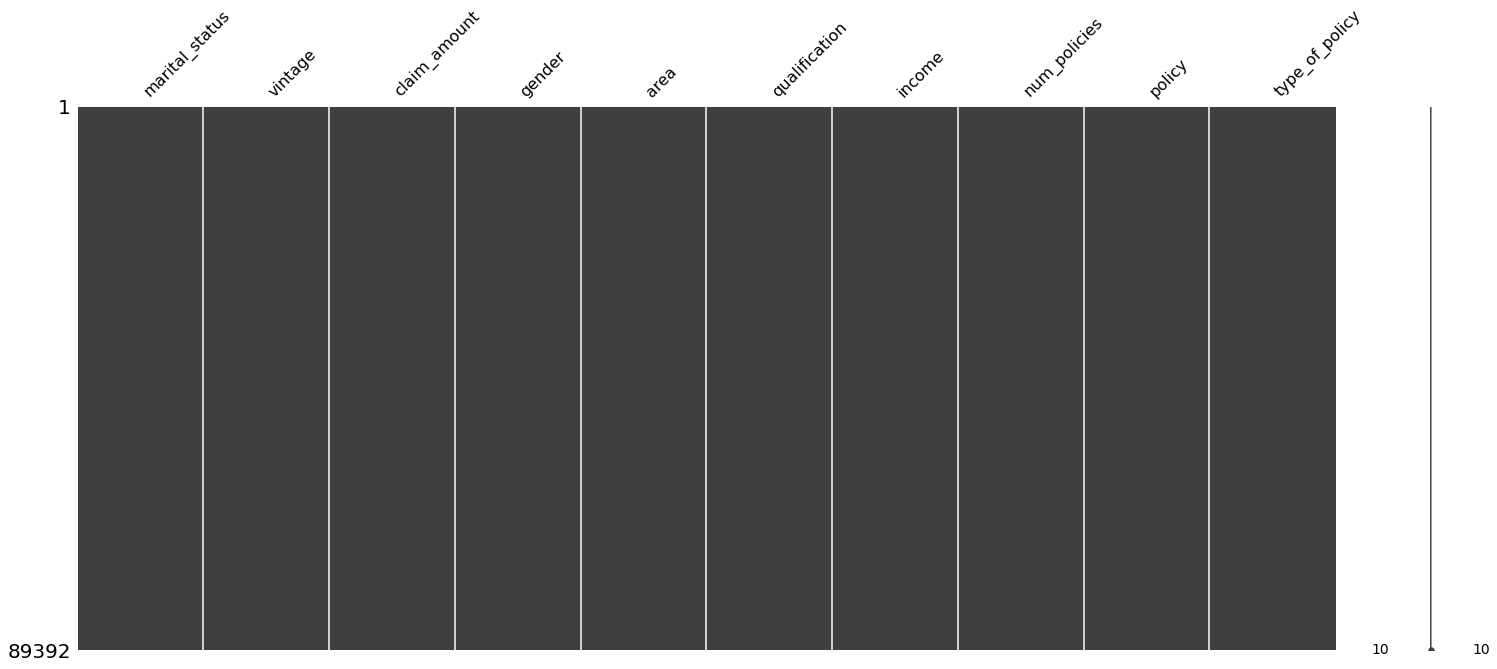

In [16]:
## visualizing the missing values
import missingno as msgn

msgn.matrix(train[num_feat + cat_feat])

**It seems there are not missing values in the data**

<AxesSubplot:xlabel='claim_amount'>

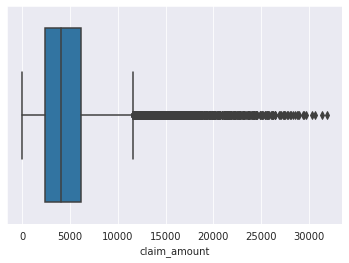

In [17]:
## Let's check for the outliers in the data
sns.set_style('darkgrid')
sns.boxplot(train['claim_amount'])

<AxesSubplot:xlabel='claim_amount', ylabel='Density'>

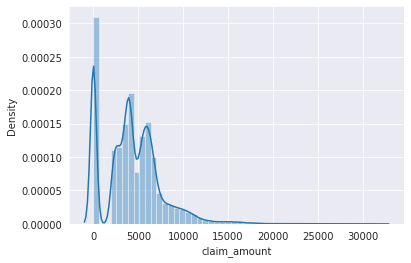

In [18]:
sns.distplot(train['claim_amount'])

**It seems that the numerical data has a lot of outliers**

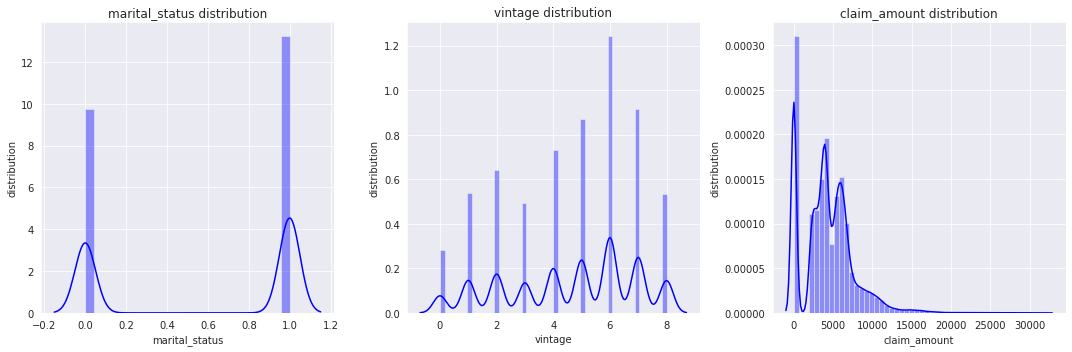

In [19]:
## checking the distribution of  numerical features

sns.set_style('darkgrid')
plt.figure(figsize=(15,5))
for index, feature in enumerate(num_feat):
    plt.subplot(1,3,index+1)
    sns.distplot(train[feature],kde=True, color='b')
    plt.xlabel(feature)
    plt.ylabel('distribution')
    plt.title(f"{feature} distribution")

plt.tight_layout()

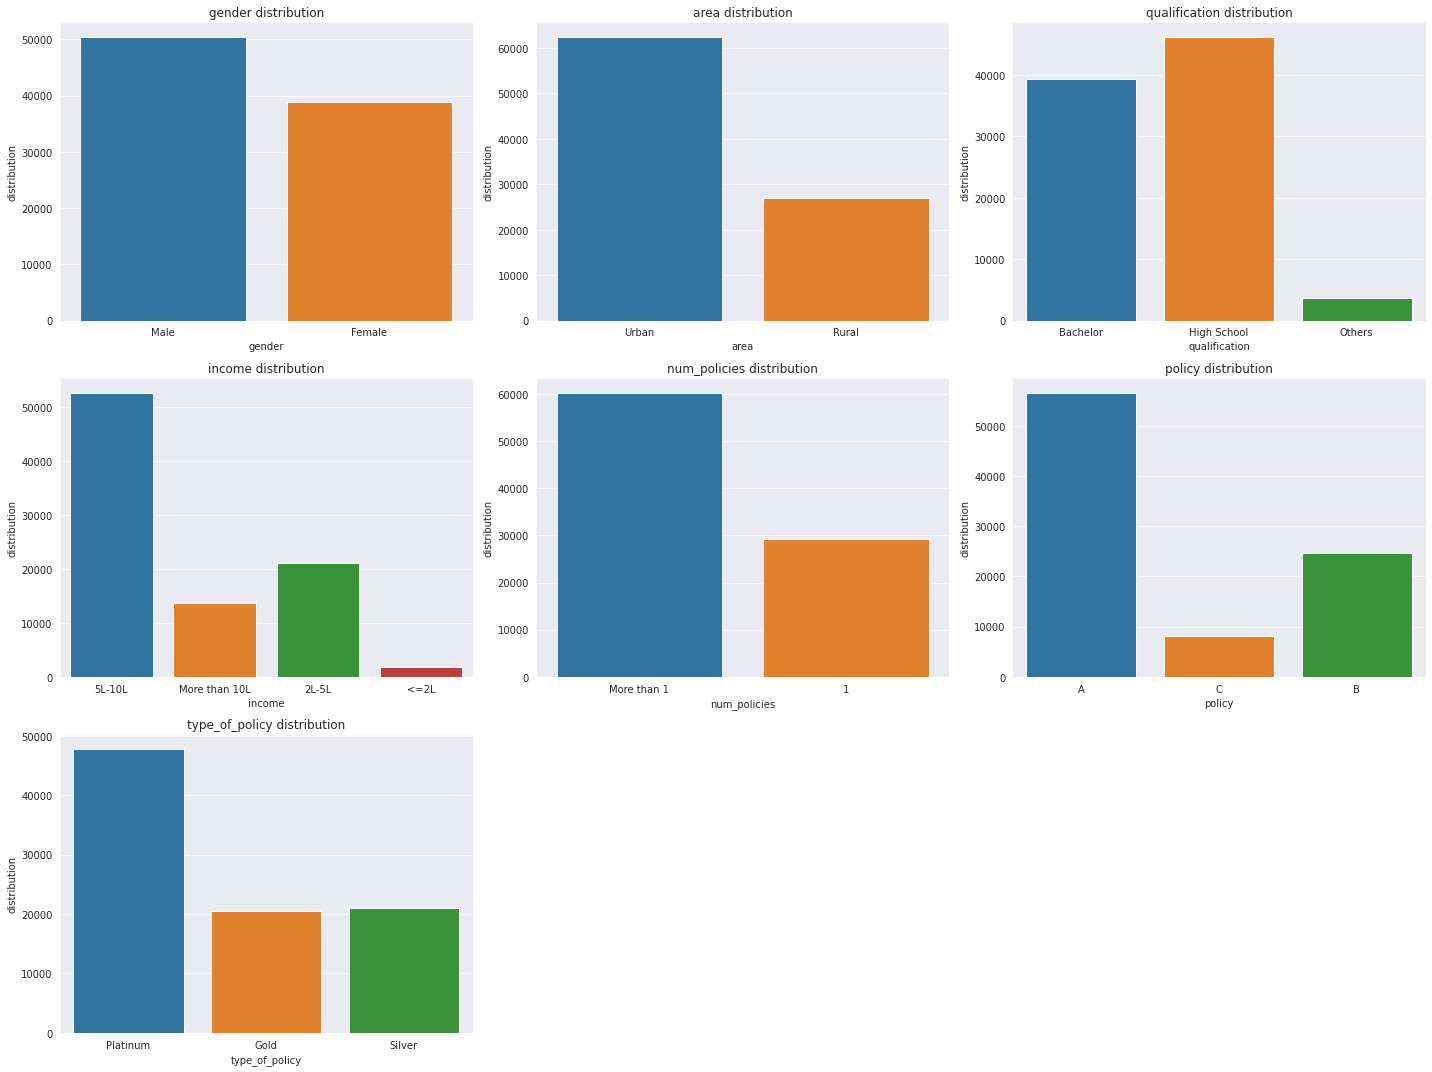

In [20]:
## checking out the distribution of  categorical features

sns.set_style('darkgrid')
plt.figure(figsize=(20,15))
for index, feature in enumerate(cat_feat):
    plt.subplot(3,3,index+1)
    sns.countplot(x=feature,data=train)
    plt.xlabel(feature)
    plt.ylabel('distribution')
    plt.title(f"{feature} distribution")
    
plt.tight_layout()

In [21]:
## checking the importance of features

from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import OrdinalEncoder

X_cat_scaled = pd.DataFrame(OrdinalEncoder().fit_transform(train[cat_feat]), columns=cat_feat)
whole_data = pd.concat([X_cat_scaled, train[num_feat]],axis=1)

temp_rfr_model = RandomForestRegressor(random_state=0).fit(whole_data,y)

fi = pd.DataFrame()
fi['Feature'] = cat_feat + num_feat
fi['Importance (%)'] = np.round(temp_rfr_model.feature_importances_ * 100, 2)

fi

,Feature,Importance (%)
0,gender,3.08
1,area,0.78
2,qualification,4.69
3,income,5.02
4,num_policies,13.66
5,policy,2.02
6,type_of_policy,5.73
7,marital_status,1.60
8,vintage,12.49
9,claim_amount,50.93


### Preprocessing and model creation

In [22]:
## replacing outliers from the column claim_amount with the median of the column
quantiles = pd.DataFrame(X['claim_amount']).quantile(np.arange(0,1,0.25)).T
quantiles = quantiles.rename(columns={0.25:'Q1', 0.50: 'Q2', 0.75:'Q3'})

quantiles['IQR'] = quantiles['Q3'] - quantiles['Q1']
quantiles['Lower_Limit'] = quantiles['Q1'] - 1.5*quantiles['IQR']
quantiles['Upper_Limit'] = quantiles['Q3'] + 1.5*quantiles['IQR']

X['claim_amount'] = np.where((X['claim_amount'] < quantiles.loc['claim_amount','Lower_Limit']) | (X['claim_amount'] > quantiles.loc['claim_amount','Upper_Limit']) & (X['claim_amount'] is not np.nan), X['claim_amount'].median(), X['claim_amount'])

In [23]:
## dealing with the missing values in numerical and categorical features
from sklearn.impute import SimpleImputer

imputer1 = SimpleImputer(missing_values=np.nan, strategy='mean')
X['claim_amount'] = imputer1.fit_transform(X['claim_amount'].to_numpy().reshape(-1,1))

inputer2 = SimpleImputer(missing_values=np.nan, strategy='most_frequent')
for feature in cat_feat + ['vintage', 'marital_status']:
    X[feature] = inputer2.fit_transform(X[feature].to_numpy().reshape(-1,1))

In [24]:
from sklearn.preprocessing import OrdinalEncoder, OneHotEncoder, StandardScaler

oe = OrdinalEncoder(handle_unknown='use_encoded_value', unknown_value=np.nan)
ohe = OneHotEncoder(handle_unknown='ignore')
sc = StandardScaler()

## dealing with the encoding of categorical feature
for feature in ['income', 'vintage','gender', 'area', 'qualification','num_policies', 'policy', 'type_of_policy', 'marital_status']:
    X[feature] = oe.fit_transform(X[feature].to_numpy().reshape(-1,1))

## dealing with the scaling of numerical feature
X['claim_amount'] = sc.fit_transform(X['claim_amount'].to_numpy().reshape(-1,1))

In [25]:
X

,gender,area,qualification,income,marital_status,vintage,claim_amount,num_policies,policy,type_of_policy
0,1.0,1.0,0.0,1.0,1.0,5.0,0.622952,1.0,0.0,1.0
1,1.0,0.0,1.0,1.0,0.0,8.0,0.364312,1.0,0.0,1.0
2,1.0,1.0,0.0,1.0,1.0,8.0,-0.539474,1.0,0.0,1.0
3,0.0,0.0,1.0,1.0,0.0,7.0,-1.486244,1.0,0.0,1.0
4,1.0,1.0,1.0,3.0,1.0,6.0,-0.208341,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...
89387,1.0,0.0,1.0,3.0,0.0,6.0,-1.486244,1.0,1.0,1.0
89388,1.0,1.0,0.0,1.0,1.0,0.0,-0.066635,1.0,0.0,1.0
89389,0.0,1.0,0.0,1.0,0.0,4.0,-0.261162,1.0,1.0,1.0
89390,0.0,0.0,1.0,0.0,0.0,8.0,-1.486244,1.0,1.0,1.0


In [26]:
# !pip install xgboost
# !pip install lightgbm
# !pip install catboost

In [27]:
## model 1: Support Vector Regression
from sklearn.svm import SVR
svr = SVR()

## model 2: Nearest Neighbors Regression
from sklearn.neighbors import KNeighborsRegressor
knr = KNeighborsRegressor()

## model 3: Decision Tree Regression
from sklearn.tree import DecisionTreeRegressor
dtr = DecisionTreeRegressor(random_state=123)

## model 4: Random Forest Regression
from sklearn.ensemble import RandomForestRegressor
rfr = RandomForestRegressor(random_state=23)

## model 5: Xgboost Regressor
from xgboost import XGBRegressor
xgbr = XGBRegressor(seed=24324)

## model 6: AdaBoost Regressor
from sklearn.ensemble import AdaBoostRegressor
abr = AdaBoostRegressor(random_state=23)

## model 7: Gradient Boosting Regressor
from sklearn.ensemble import GradientBoostingRegressor
gbr = GradientBoostingRegressor(random_state=23)

## model 8: light gbm regressor
from lightgbm import LGBMRegressor
lgbmr = LGBMRegressor(random_state=23)

## model 9: catboost regressor
from catboost import CatBoostRegressor
cbr = CatBoostRegressor(verbose=False,random_seed=23)

## model 10: voting regressor of model 4, model 8 and model 9
from sklearn.ensemble import VotingRegressor
vr = VotingRegressor(estimators = [('lgbmr', lgbmr), ('cbr', cbr), ('rfr', rfr)])

In [28]:
# def adjusted_rsquare(y_true, y_pred, **kwargs):
#     adjusted_r_squared = 1 - (1-r2_score(y_true, y_pred))*(len(y_pred)-1)/(len(y_pred)-X.shape[1]-1)
#     return adjusted_r_squared

# from sklearn.metrics import make_scorer
# my_scorer = make_scorer(adjusted_rsquare, greater_is_better=True)

In [29]:
## Finding out the best model using the cross validation 
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

models = [svr, knr, dtr, rfr, xgbr, abr, gbr, vr, lgbmr, cbr]
model_names = ['SupportVectorRegressor', 'KneighborsRegressor', 'DecisionTreeRegressor', 'RandomForestRegressor', 'XgboostRegressor', 'AdaboostRegressor', 'GradientBoostRegressor', 'VotingRegressor', 'LGBMRegressor', 'CatBoostRegressor']
cv = KFold(n_splits=3)
for index, model in enumerate(models):
    cvs = cross_val_score(estimator=model, X=X, y=y,cv=cv,scoring='r2')
    mean = np.round(cvs.mean(),3)
    std = np.round(cvs.std(),3)
    print(f"The cross validation score for the model {model_names[index]} is {mean} +/- {std}.")

The cross validation score for the model SupportVectorRegressor is -0.118 +/- 0.002.
The cross validation score for the model KneighborsRegressor is -0.016 +/- 0.003.
The cross validation score for the model DecisionTreeRegressor is -0.741 +/- 0.05.
The cross validation score for the model RandomForestRegressor is 0.03 +/- 0.004.
The cross validation score for the model XgboostRegressor is 0.134 +/- 0.003.
The cross validation score for the model AdaboostRegressor is 0.014 +/- 0.007.
The cross validation score for the model GradientBoostRegressor is 0.159 +/- 0.004.
The cross validation score for the model VotingRegressor is 0.139 +/- 0.004.
The cross validation score for the model LGBMRegressor is 0.156 +/- 0.004.
The cross validation score for the model CatBoostRegressor is 0.147 +/- 0.004.


In [30]:
## let's perform hyper-parameter tuning on high scoring models: xgboost, gradient boost, voting, lgbm, catboost (Let's first perform a coarse tuning)

from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import KFold

xgbr_params = {"learning_rate"    : [0.05, 0.10, 0.15, 0.20, 0.25, 0.30] ,
             "max_depth"        : [ 3, 4, 5, 6, 8],
             "min_child_weight" : [ 1, 3, 5, 7 ],
             "gamma"            : [ 0.0, 0.1, 0.2 , 0.3, 0.4 ],
             "colsample_bytree" : [ 0.3, 0.4, 0.5 , 0.7 ] }

gbr_params = {"learning_rate"    : [0.05, 0.10, 0.15, 0.20, 0.25, 0.30],
              "n_estimators": [50,100,150,200,250,300,350,400],
              "min_samples_split": [2,3,4,5],
              "max_depth": [3, 4, 5, 6, 8],
              "max_features": [7,8,9,10]}

lgbmr_params = {"boosting_type": ['gbdt', 'dart'],
               "max_depth": [ 3, 4, 5, 6, 8],
               'learning_rate':[0.05, 0.10, 0.15, 0.20, 0.25, 0.30],
               "n_estimators": [50,100,150,200,250,300,350,400]}

cbr_params = {"learning_rate": [0.05, 0.10, 0.15, 0.20, 0.25, 0.30],
             "depth": [ 3, 4, 5, 6, 8]}

tuning_algos = [xgbr, gbr, lgbmr, cbr]
tuning_algo_names = ['XGBoostRegressor', 'GradientBoostingRegressor', 'LightGBM Regressor', 'Catboost Regressor']
params = [xgbr_params, gbr_params, lgbmr_params, cbr_params]
cv = KFold(n_splits=3)

for index, algo in enumerate(tuning_algos):
    grid = RandomizedSearchCV(algo, params[index], scoring='r2', cv=cv, random_state=23)
    search = grid.fit(X, y)
    print(f"The algorithm named {tuning_algo_names[index]} has best score of {search.best_score_} using the best parameters as {search.best_params_}.\n")

The algorithm named XGBoostRegressor has best score of 0.15950089569003598 using the best parameters as {'min_child_weight': 3, 'max_depth': 4, 'learning_rate': 0.05, 'gamma': 0.4, 'colsample_bytree': 0.7}.

The algorithm named GradientBoostingRegressor has best score of 0.15918221757010828 using the best parameters as {'n_estimators': 50, 'min_samples_split': 3, 'max_features': 10, 'max_depth': 4, 'learning_rate': 0.15}.

The algorithm named LightGBM Regressor has best score of 0.1593089998363902 using the best parameters as {'n_estimators': 300, 'max_depth': 4, 'learning_rate': 0.15, 'boosting_type': 'dart'}.

The algorithm named Catboost Regressor has best score of 0.15706444034378145 using the best parameters as {'learning_rate': 0.1, 'depth': 3}.



In [31]:
## let's perform finner tunning
from sklearn.model_selection import GridSearchCV

xgbr_params = {"learning_rate"    : [0.05, 0.10] ,
             "max_depth"        : [3, 4, 5],
             "min_child_weight" : [2, 3, 4],
             "gamma"            : [0.35, 0.4,0.45],
             "colsample_bytree" : [0.65, 0.70, 0.75 ]}

grid = GridSearchCV(xgbr, xgbr_params, scoring='r2', cv=3)
search = grid.fit(X, y)
print(f"The algorithm named XGBoost Regressor has best score of {search.best_score_} using the best parameters as {search.best_params_}.\n")

The algorithm named XGBoost Regressor has best score of 0.16010017267586676 using the best parameters as {'colsample_bytree': 0.7, 'gamma': 0.35, 'learning_rate': 0.1, 'max_depth': 3, 'min_child_weight': 4}.



In [32]:
gbr_params = {"learning_rate"    : [0.05, 0.10, 0.15],
              "n_estimators": [50,75,100],
              "min_samples_split": [2,3,4],
              "max_depth": [3, 4, 5],
              "max_features": [8,9,10]}

grid = GridSearchCV(gbr, gbr_params, scoring='r2', cv=3)
search = grid.fit(X, y)
print(f"The algorithm named GradientBoosting Regressor has best score of {search.best_score_} using the best parameters as {search.best_params_}.\n")

The algorithm named GradientBoosting Regressor has best score of 0.1597081362245026 using the best parameters as {'learning_rate': 0.1, 'max_depth': 3, 'max_features': 8, 'min_samples_split': 3, 'n_estimators': 100}.



In [33]:
lgbmr_params = {"boosting_type": ['gbdt', 'dart'],
               "max_depth": [ 3, 4, 5],
               'learning_rate':[0.05, 0.10, 0.15],
               "n_estimators": [275,300,375]}

grid = GridSearchCV(lgbmr, lgbmr_params, scoring='r2', cv=3)
search = grid.fit(X, y)
print(f"The algorithm named LightGBM Regressor has best score of {search.best_score_} using the best parameters as {search.best_params_}.\n")

The algorithm named LightGBM Regressor has best score of 0.159999047773404 using the best parameters as {'boosting_type': 'gbdt', 'learning_rate': 0.05, 'max_depth': 3, 'n_estimators': 275}.



In [34]:
## setting the parameters to the model
xgbr.set_params(colsample_bytree= 0.7, gamma= 0.35, learning_rate= 0.1, max_depth= 3, min_child_weight= 4)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=0.7, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, gamma=0.35,
             gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.1, max_bin=None,
             max_cat_to_onehot=None, max_delta_step=None, max_depth=3,
             max_leaves=None, min_child_weight=4, missing=nan,
             monotone_constraints=None, n_estimators=100, n_jobs=None,
             num_parallel_tree=None, predictor=None, random_state=None,
             reg_alpha=None, reg_lambda=None, ...)

In [35]:
gbr.set_params(learning_rate= 0.1, max_depth= 3, max_features= 8, min_samples_split= 3, n_estimators= 100)

GradientBoostingRegressor(max_features=8, min_samples_split=3, random_state=23)

In [36]:
lgbmr.set_params(boosting_type= 'gbdt', learning_rate= 0.05, max_depth= 3, n_estimators= 275)

LGBMRegressor(learning_rate=0.05, max_depth=3, n_estimators=275,
              random_state=23)

In [37]:
## now fitting the three models on train data
import pickle
xgbr_model = xgbr.fit(X,y)

## saving the model
with open('/kaggle/working/xgbr_model.pkl', 'wb') as f:
    pickle.dump(xgbr_model, f)

In [38]:
gbr_model = gbr.fit(X,y)

## saving the model
with open('/kaggle/working/gbr_model.pkl', 'wb') as f:
    pickle.dump(gbr_model, f)

In [39]:
lgbmr_model = lgbmr.fit(X,y)

## saving the model
with open('/kaggle/working/lgbmr_model.pkl', 'wb') as f:
    pickle.dump(lgbmr_model, f)

In [40]:
## Let's load the test data
test = pd.read_csv("/kaggle/input/customer-life-time-prediction/test_koRSKBP.csv")
test.head()

,id,gender,area,qualification,income,marital_status,vintage,claim_amount,num_policies,policy,type_of_policy
0,89393,Female,Rural,High School,5L-10L,0,6,2134,More than 1,B,Silver
1,89394,Female,Urban,High School,2L-5L,0,4,4102,More than 1,A,Platinum
2,89395,Male,Rural,High School,5L-10L,1,7,2925,More than 1,B,Gold
3,89396,Female,Rural,Bachelor,More than 10L,1,2,0,More than 1,B,Silver
4,89397,Female,Urban,High School,2L-5L,0,5,14059,More than 1,B,Silver


In [41]:
## creating a prediction dataframe
predictions = pd.DataFrame()
predictions['id'] = test['id']

In [42]:
## removing id column from test
test.drop('id',axis=1, inplace=True)

In [43]:
test.head()

,gender,area,qualification,income,marital_status,vintage,claim_amount,num_policies,policy,type_of_policy
0,Female,Rural,High School,5L-10L,0,6,2134,More than 1,B,Silver
1,Female,Urban,High School,2L-5L,0,4,4102,More than 1,A,Platinum
2,Male,Rural,High School,5L-10L,1,7,2925,More than 1,B,Gold
3,Female,Rural,Bachelor,More than 10L,1,2,0,More than 1,B,Silver
4,Female,Urban,High School,2L-5L,0,5,14059,More than 1,B,Silver


In [44]:
## replacing outliers from the column claim_amount with the median of the column
quantiles = pd.DataFrame(test['claim_amount']).quantile(np.arange(0,1,0.25)).T
quantiles = quantiles.rename(columns={0.25:'Q1', 0.50: 'Q2', 0.75:'Q3'})

quantiles['IQR'] = quantiles['Q3'] - quantiles['Q1']
quantiles['Lower_Limit'] = quantiles['Q1'] - 1.5*quantiles['IQR']
quantiles['Upper_Limit'] = quantiles['Q3'] + 1.5*quantiles['IQR']

test['claim_amount'] = np.where((test['claim_amount'] < quantiles.loc['claim_amount','Lower_Limit']) | (test['claim_amount'] > quantiles.loc['claim_amount','Upper_Limit']) & (test['claim_amount'] is not np.nan), test['claim_amount'].median(), test['claim_amount'])

In [45]:
## dealing with the missing values in numerical and categorical features

test['claim_amount'] = imputer1.transform(test['claim_amount'].to_numpy().reshape(-1,1))

for feature in cat_feat + ['vintage', 'marital_status']:
    test[feature] = inputer2.transform(test[feature].to_numpy().reshape(-1,1))

In [46]:
from sklearn.preprocessing import OrdinalEncoder, OneHotEncoder, StandardScaler

## dealing with the encoding of categorical feature
for feature in ['income', 'vintage','gender', 'area', 'qualification','num_policies', 'policy', 'type_of_policy', 'marital_status']:
    test[feature] = oe.transform(test[feature].to_numpy().reshape(-1,1))

## dealing with the scaling of numerical feature
test['claim_amount'] = sc.transform(test['claim_amount'].to_numpy().reshape(-1,1))

In [47]:
test_pred = xgbr_model.predict(test)

In [48]:
predictions['cltv'] = test_pred

In [49]:
predictions.head()

,id,cltv
0,89393,52576.527344
1,89394,60638.476562
2,89395,55275.000000
3,89396,50405.707031
4,89397,60638.476562


In [50]:
predictions.to_csv('/kaggle/working/predictions.csv', index=False)